In [ ]:
from PIL import Image,ImageOps
import numpy as np
import matplotlib.pyplot as plt

im = Image.open("lena.png")

def quantizza_K(row,col,image,K):
    """
        quantizza immagine a scala di grigio a K livelli
    """
    q_pass=256/K
    levels=[ int(i*q_pass) for i in range(K)]
    for i in range(row):
        for j in range(col):
            pixel_value=image.getpixel((i,j))
            image.putpixel((i,j),levels[int(np.floor(pixel_value/q_pass))])
    return image

def dethering_random(row,col,image,K):
    """
        Applica il dethering random e poi quantizza a K livelli
    """
    q_pass=256/K
    P=q_pass
    levels=[ int(i*q_pass) for i in range(K)] ## K+1 perche capita 255 + random
    for i in range(row):
        for j in range(col):
            pixel_value=image.getpixel((i,j))
            random=np.random.uniform(-P/2,P/2)
            try:
                image.putpixel((i,j),levels[int(np.floor((pixel_value+random)/q_pass))])
            except IndexError:
                image.putpixel((i,j),levels[-1])
    return image


def dethering_ordered(row,col,image,K):
    ##passo di quantizzazione
    w=256/K
    M=np.array([[0,2],[3,1]])
    for i in range(row):
        for j in range(col):
            gray_value=image.getpixel((i,j))
            gray_nuovo=gray_value+w*(1/4*M[i % 2][j % 2]-0.5)
            image.putpixel((i,j),int(gray_nuovo))
            
    return quantizza_K(row,col,image,K)


def dethering_error_diffusion_floyd(row,col,image,K):
    q_pass=256/K
    levels=[ int(i*q_pass) for i in range(K+1)] ## K+1
    new_matrix=np.array(image)
    new_matrix=new_matrix.astype(float)
    count=0
    for i in range(row):
        for j in range(col):
            pixel_value=new_matrix[i][j]
            try:
                pixel_value_quant=levels[int(np.floor(new_matrix[i][j]/q_pass))]
            except IndexError:
                pixel_value_quant=levels[-1]
            err=(pixel_value-pixel_value_quant)
            if ((i-1>0 and j-1>0 and j+1<col and i+1<row )):
                new_matrix[i][j+1]+=err*(7/16)
                new_matrix[i+1][j+1]+=err/16
                new_matrix[i+1][j]+=err*(5/16)
                new_matrix[i+1][j-1]+=err*(3/16)
    
    #from array to image !!
    for i in range(row):
        for j in range(col):
            try:
                new_matrix[j][i]=levels[int(np.floor(new_matrix[j][i]/q_pass))]
            except IndexError:
                new_matrix[j][i]=levels[-1]
            
            image.putpixel((i,j),int(new_matrix[j][i]))
    return image

def dethering_error_diffusion_jarvis(row,col,image,K):
    q_pass=256/K
    levels=[ int(i*q_pass) for i in range(K+1)] ## K+1
    new_matrix=np.array(image)
    new_matrix=new_matrix.astype(float)
    count=0
    for i in range(row):
        for j in range(col):
            pixel_value=new_matrix[i][j]
            try:
                pixel_value_quant=levels[int(np.floor(new_matrix[i][j]/q_pass))]
            except IndexError:
                pixel_value_quant=levels[-1]
            err=(pixel_value-pixel_value_quant)
            if ((i-2>0 and j-2>0 and j+2<col and i+2<row )):
                new_matrix[i][j+1]+=err*(7/48)
                new_matrix[i][j+2]+=err*(5/48)
                new_matrix[i+1][j-2]+=err*(3/48)
                new_matrix[i+1][j-1]+=err*(5/48)
                new_matrix[i+1][j]+=err*(7/48)
                new_matrix[i+1][j+1]+=err*(5/48)
                new_matrix[i+1][j+2]+=err*(3/48)
                new_matrix[i+2][j-2]+=err*(1/48)
                new_matrix[i+2][j-1]+=err*(3/48)
                new_matrix[i+2][j]+=err*(5/48)
                new_matrix[i+2][j+1]+=err*(3/48)
                new_matrix[i+2][j+2]+=err*(1/48)
                  
                   
    #from array to image !!
    for i in range(row):
        for j in range(col):
            try:
                new_matrix[j][i]=levels[int(np.floor(new_matrix[j][i]/q_pass))]
            except IndexError:
                new_matrix[j][i]=levels[-1]
            
            image.putpixel((i,j),int(new_matrix[j][i]))
    return image


def dethering_error_diffusion_stucki(row,col,image,K):
    q_pass=256/K
    levels=[ int(i*q_pass) for i in range(K)] ## K+1
    new_matrix=np.array(image)
    new_matrix=new_matrix.astype(float)
    count=0
    for i in range(row):
        for j in range(col):
            pixel_value=new_matrix[i][j]
            try:
                pixel_value_quant=levels[int(np.floor(new_matrix[i][j]/q_pass))]
            except IndexError:
                pixel_value_quant=levels[-1]
            err=(pixel_value-pixel_value_quant)
            if ((i-2>0 and j-2>0 and j+2<col and i+2<row )):
                new_matrix[i][j+1]+=err*(8/42)
                new_matrix[i][j+2]+=err*(4/42)
                new_matrix[i+1][j-2]+=err*(2/42)
                new_matrix[i+1][j-1]+=err*(4/42)
                new_matrix[i+1][j]+=err*(8/42)
                new_matrix[i+1][j+1]+=err*(4/42)
                new_matrix[i+1][j+2]+=err*(2/42)
                new_matrix[i+2][j-2]+=err*(1/42)
                new_matrix[i+2][j-1]+=err*(2/42)
                new_matrix[i+2][j]+=err*(4/42)
                new_matrix[i+2][j+1]+=err*(2/42)
                new_matrix[i+2][j+2]+=err*(1/42)
                  
                   
    #from array to image !!
    for i in range(row):
        for j in range(col):
            try:
                new_matrix[j][i]=levels[int(np.floor(new_matrix[j][i]/q_pass))]
            except IndexError:
                new_matrix[j][i]=levels[-1]
            
            image.putpixel((i,j),int(new_matrix[j][i]))
    return image


def dethering_error_diffusion_burkes(row,col,image,K):
    q_pass=256/K
    levels=[ int(i*q_pass) for i in range(K)] ## K+1
    new_matrix=np.array(image)
    new_matrix=new_matrix.astype(float)
    count=0
    for i in range(row):
        for j in range(col):
            pixel_value=new_matrix[i][j]
            try:
                pixel_value_quant=levels[int(np.floor(new_matrix[i][j]/q_pass))]
            except IndexError:
                pixel_value_quant=levels[-1]
            err=(pixel_value-pixel_value_quant)
            if ((i-2>0 and j-2>0 and j+2<col and i+2<row )):
                new_matrix[i][j+1]+=err*(8/32)
                new_matrix[i][j+2]+=err*(4/32)
                new_matrix[i+1][j-2]+=err*(2/32)
                new_matrix[i+1][j-1]+=err*(4/32)
                new_matrix[i+1][j]+=err*(8/32)
                new_matrix[i+1][j+1]+=err*(4/32)
                new_matrix[i+1][j+2]+=err*(2/32)
                  
                   
    #from array to image !!
    for i in range(row):
        for j in range(col):
            try:
                new_matrix[j][i]=levels[int(np.floor(new_matrix[j][i]/q_pass))]
            except IndexError:
                new_matrix[j][i]=levels[-1]
            
            image.putpixel((i,j),int(new_matrix[j][i]))
    return image


def dethering_error_diffusion_atkinsonis(row,col,image,K):
    q_pass=256/K
    levels=[ int(i*q_pass) for i in range(K)] ## K+1
    new_matrix=np.array(image)
    new_matrix=new_matrix.astype(float)
    count=0
    for i in range(row):
        for j in range(col):
            pixel_value=new_matrix[i][j]
            try:
                pixel_value_quant=levels[int(np.floor(new_matrix[i][j]/q_pass))]
            except IndexError:
                pixel_value_quant=levels[-1]
            err=(pixel_value-pixel_value_quant)
            if ((i-2>0 and j-2>0 and j+2<col and i+2<row )):
                new_matrix[i][j+1]+=err*(1/8)
                new_matrix[i][j+2]+=err*(1/8)
                new_matrix[i+1][j-2]+=err*(0/8)
                new_matrix[i+1][j-1]+=err*(1/8)
                new_matrix[i+1][j]+=err*(1/8)
                new_matrix[i+1][j+1]+=err*(1/8)
                new_matrix[i+1][j+2]+=err*(0/8)
                new_matrix[i+2][j-2]+=err*(0)
                new_matrix[i+2][j-1]+=err*(0)
                new_matrix[i+2][j]+=err*(1/8)
                new_matrix[i+2][j+1]+=err*(0)
                new_matrix[i+2][j+2]+=err*(0)
                  
                   
    #from array to image !!
    for i in range(row):
        for j in range(col):
            try:
                new_matrix[j][i]=levels[int(np.floor(new_matrix[j][i]/q_pass))]
            except IndexError:
                new_matrix[j][i]=levels[-1]
            
            image.putpixel((i,j),int(new_matrix[j][i]))
    return image


def dethering_error_diffusion_sierra(row,col,image,K):
    q_pass=256/K
    levels=[ int(i*q_pass) for i in range(K)] ## K+1
    new_matrix=np.array(image)
    new_matrix=new_matrix.astype(float)
    count=0
    for i in range(row):
        for j in range(col):
            pixel_value=new_matrix[i][j]
            try:
                pixel_value_quant=levels[int(np.floor(new_matrix[i][j]/q_pass))]
            except IndexError:
                pixel_value_quant=levels[-1]
            err=(pixel_value-pixel_value_quant)
            if ((i-2>0 and j-2>0 and j+2<col and i+2<row )):
                new_matrix[i][j+1]+=err*(5/32)
                new_matrix[i][j+2]+=err*(3/32)
                new_matrix[i+1][j-2]+=err*(2/32)
                new_matrix[i+1][j-1]+=err*(4/32)
                new_matrix[i+1][j]+=err*(5/32)
                new_matrix[i+1][j+1]+=err*(4/32)
                new_matrix[i+1][j+2]+=err*(2/32)
                new_matrix[i+2][j-2]+=err*(0/32)
                new_matrix[i+2][j-1]+=err*(2/32)
                new_matrix[i+2][j]+=err*(3/32)
                new_matrix[i+2][j+1]+=err*(2/32)
                new_matrix[i+2][j+2]+=err*(0/32)
                  
                   
    #from array to image !!
    for i in range(row):
        for j in range(col):
            try:
                new_matrix[j][i]=levels[int(np.floor(new_matrix[j][i]/q_pass))]
            except IndexError:
                new_matrix[j][i]=levels[-1]
            
            image.putpixel((i,j),int(new_matrix[j][i]))
    return image

def dethering_error_diffusion_tworowsierra(row,col,image,K):
    q_pass=256/K
    levels=[ int(i*q_pass) for i in range(K)] ## K+1
    new_matrix=np.array(image)
    new_matrix=new_matrix.astype(float)
    count=0
    for i in range(row):
        for j in range(col):
            pixel_value=new_matrix[i][j]
            try:
                pixel_value_quant=levels[int(np.floor(new_matrix[i][j]/q_pass))]
            except IndexError:
                pixel_value_quant=levels[-1]
            err=(pixel_value-pixel_value_quant)
            if ((i-2>0 and j-2>0 and j+2<col and i+2<row )):
                new_matrix[i][j+1]+=err*(4/16)
                new_matrix[i][j+2]+=err*(3/16)
                new_matrix[i+1][j-2]+=err*(1/16)
                new_matrix[i+1][j-1]+=err*(2/16)
                new_matrix[i+1][j]+=err*(3/16)
                new_matrix[i+1][j+1]+=err*(2/16)
                new_matrix[i+1][j+2]+=err*(1/16)
                  
                   
    #from array to image !!
    for i in range(row):
        for j in range(col):
            try:
                new_matrix[j][i]=levels[int(np.floor(new_matrix[j][i]/q_pass))]
            except IndexError:
                new_matrix[j][i]=levels[-1]
            
            image.putpixel((i,j),int(new_matrix[j][i]))
    return image


def dethering_error_diffusion_myfilter(row,col,image,K,my_filter,sum_m):
    ##CONTINUE
    q_pass=256/K
    levels=[ int(i*q_pass) for i in range(K+1)] ## K+1
    new_matrix=np.array(image)
    new_matrix=new_matrix.astype(float)
    my_filter_row,my_filter_col=my_filter.shape
    for i in range(row):
        for j in range(col):
            pixel_value=new_matrix[i][j]
            try:
                pixel_value_quant=levels[int(np.floor(new_matrix[i][j]/q_pass))]
            except IndexError:
                pixel_value_quant=levels[-1]
            err=(pixel_value-pixel_value_quant)
            if ((i-3>0 and j-3>0 and j+3<col and i+3<row )):
                ##VINCOLI SOPRA OFFSET COL
                offset_col=2
                for k in range(my_filter_row):
                    for h in range(my_filter_col):
                        new_matrix[i+k][j-offset_col+h]+=my_filter[k][h]/sum_m*err
                    
            
    #from array to image !!
    
    for i in range(row):
        for j in range(col):
            try:
                new_matrix[j][i]=levels[int(np.floor(new_matrix[j][i]/q_pass))]
            except IndexError:
                new_matrix[j][i]=levels[-1]
            
            image.putpixel((i,j),int(new_matrix[j][i]))
    
    return image





#im_gray_random = ImageOps.grayscale(im) ## imagine a scala di grigio
#im_gray_random=dethering_random(480,480,im_gray_random,4)
#im_gray_random.show()


#im_gray_ordered = ImageOps.grayscale(im) ## imagine a scala di grigio
#im_gray_ordered=dethering_ordered(480,480,im_gray_ordered,4)
#im_gray_ordered.show()


im_gray_error = ImageOps.grayscale(im) ## imagine a scala di grigio
im_array=dethering_error_diffusion_floyd(480,480,im_gray_error,4)
im_array.show()

im_gray_myfilter = ImageOps.grayscale(im) ## imagine a scala di grigio
im_array=dethering_error_diffusion_myfilter(480,480,im_gray_myfilter,4,np.array([[0,0,0,7,7],[7,7,7,7,7],[7,7,7,7,7]]),49)
im_array.show()



In [3]:
##### Trasformata di Haard
import numpy as np
from PIL import Image,ImageOps

def H_k(t,k):
    # t value
    if ((t>=1) or (t<0)):
        print("Non è definita, solo per valori t app [0-1[")
        return 0
    #ordine 0
    if k==0:
        return 1
    #ordine 1
    elif k==1:
        if ((t>=0) and (t<0.5)):
            return 1
        else:
            return -1
    else:
        p=int(np.floor(np.log2(k)))
        due_p=np.power(2,p)
        n=k-due_p
        if ((t>=n/due_p) and (t< (n+0.5)/due_p)):
            return np.sqrt(due_p)
        elif ((t>= (n+0.5)/due_p and t<(n+1)/due_p)):
            return -np.sqrt(due_p)
        else:
            return 0


def Trasformata_Haard(segnale,N):
    #USARE N=20 per vedere le basi (Out of memory ...)
    #N=20
    
    dimensione=segnale.ndim
    values_t=np.array([i/N for i in range(N)]) # t=0,1/N,2/N.. (N-1)/N
    
    H_matrix=np.zeros(N)
    for ordine in range(N):
        H=[]
        for value in values_t:
            H.append(H_k(value,ordine))
        H_matrix=np.vstack([H_matrix,H])
    
    H_matrix=H_matrix[1:]  ## matrice H (di trasformazione)
    
    ##FATTORE DI NORMALIZZAZIONE -> METTERLO 1/rad(N)
    
    if dimensione==1:
        segnale.reshape(N,1)
        A_matrix=np.dot(H_matrix,segnale) ## matrice A (coefficenti)
        print("Dimensione 1")
        #print(H_matrix)
        #print(A_matrix)
        
    elif dimensione==2:
        A_matrix=np.dot(np.dot(1/np.sqrt(N)*H_matrix,segnale),1/np.sqrt(N)*H_matrix.T) ## matrice coefficenti
        print("Dimensione 2")
        
        ##Crea tutte le matrici H_ij
        """
        H_matrix_list=[]
        for i in range(N):
            temp_matrix=[]
            for j in range(N):
                H_i=H_matrix[i].reshape(N,1)
                H_j=H_matrix[j].reshape(N,1).T
                temp_matrix.append(np.dot(H_i,H_j))
            H_matrix_list.append(temp_matrix)
        
        I=np.zeros(N**4)
        I=I.reshape(N**2,N**2)
        for i in range(N):
            for j in range(N):
                I[(i*N):(i*N+N),(j*N):(j*N+N)]=H_matrix_list[i][j]                
        
        I[I>0]=255
        I[I==0]=127
        I[I<0]=0
        
    
        img=Image.fromarray(I)  #MOSTRO LE BASI H 
        img.show()
        """
        #mostro A (matrice coefficenti) immagine lena ridimensionata
        """
        img=Image.fromarray(A_matrix*np.sqrt(N))
        img.show()
        img=Image.fromarray(np.log2(A_matrix)*np.sqrt(N))
        img.show()
        
        
        ## Ricostruisco il segnale
        A_matrix[100:-1,100:-1]=0
        
        img=Image.fromarray(A_matrix*np.sqrt(N))
        img.show()
        """
        
        S_ricostruito=np.dot(np.dot(H_matrix.T*1/np.sqrt(N),A_matrix),H_matrix*1/np.sqrt(N))
        
        #print("S_ricostruito")
        img=Image.fromarray(S_ricostruito)
        img.show()
        
        
        
    else:
        print("Dimensione non trattata")
        
    

    
#MONODIMENSIONALE
#segnale=np.array([1,5,6,9])
#make_H_k_vector(segnale,len(segnale))

#BIDIMENSIONALE
#   segnale=np.array([[1,5,1,1,1,1,6,9],[1,5,1,1,1,1,6,9],[1,5,1,1,1,1,6,9],[1,5,1,1,1,1,6,9],
#               [1,5,1,1,1,1,6,9],[1,5,1,1,1,1,6,9],[1,5,1,1,1,1,6,9],[1,5,1,1,1,1,6,9]])
#   make_H_k_vector(segnale,len(segnale))


#N=144
image_lena=Image.open("lena.png")
image_lena=ImageOps.grayscale(image_lena)
image_lena.show() ## LENA ORIGINALE
array_lena=np.array(image_lena) ## TRASFORMO IN ARRAY
Trasformata_Haard(array_lena,len(array_lena)) 




Dimensione 2


In [ ]:
import numpy as np
from PIL import Image,ImageOps

#image_lena=Image.open("lena_resize.png")
#image_lena=ImageOps.grayscale(image_lena)
#image_lena.show()


def W_k(t,k):
    
    if k==0:
        if t>=1 or t<0:
            return 0
        else:
            return 1
    else:
        if k%2==0:
            q=0
            j=k/2
        else:
            q=1
            j=(k-1)/2
        return (-1)**(np.floor(j/2)+q)*(W_k(2*t,j)+(-1)**(j+q)*W_k(2*t-1,j))

def Trasformata_Walsh(segnale,N):
    ##WALSH
    #N piccolo per visualizzare le basi
    #N=8
    
    dimensione=segnale.ndim
    
    #CALCOLO LE BASI
    values_t=np.array([i/N for i in range(N)]) # t=0,1/N,2/N.. (N-1)/N
    W_matrix=np.zeros(N)
    for ordine in range(N):
        W=[]
        for value in values_t:
            W.append(W_k(value,ordine))
        W_matrix=np.vstack([W_matrix,W])

    W_matrix=W_matrix[1:]  ## matrice W (di trasformazione)
        
    
    if dimensione==1:
        segnale.reshape(N,1)
        A_matrix=np.dot(W_matrix,segnale) ## matrice A (coefficenti)
        print("Dimensione 1")
        
    elif dimensione==2:
        A_matrix=np.dot(np.dot(1/np.sqrt(N)*W_matrix,segnale),1/np.sqrt(N)*W_matrix.T) ## matrice coefficenti
        print("Dimensione 2")
        
        ##BASI 
        """
        W_matrix_list=[]
        for i in range(N):
            temp_matrix=[]
            for j in range(N):
                W_i=W_matrix[i].reshape(N,1)
                W_j=W_matrix[j].reshape(N,1).T
                temp_matrix.append(np.dot(W_i,W_j))
            W_matrix_list.append(temp_matrix)

        I=np.zeros(N**4)
        I=I.reshape(N**2,N**2)
        for i in range(N):
            for j in range(N):
                I[(i*N):(i*N+N),(j*N):(j*N+N)]=W_matrix_list[i][j]                

        I[I>0]=255
        I[I==0]=127
        I[I<0]=0
        img=Image.fromarray(I)
        img.show()
        """
        
        ###COEFFICENTI
        """
        img=Image.fromarray(A_matrix*np.sqrt(N))
        img.show()
        img=Image.fromarray(np.log2(A_matrix)*np.sqrt(N))
        img.show()
        
        
        A_matrix[1:10,1:10]=0
        
        img=Image.fromarray(A_matrix*np.sqrt(N))
        img.show()
        """
        
        ## Ricostruisco il segnale
        S_ricostruito=np.dot(np.dot(W_matrix.T*1/np.sqrt(N),A_matrix),W_matrix*1/np.sqrt(N))
        #print("S_ricostruito")
        img=Image.fromarray(S_ricostruito)
        img.show()
        
        
    
    
    
    
def Hadamard_d(d):
    ##caso base 2x2
    if d==2:
        return np.array([[1,1],[1,-1]])
    else:
        return np.vstack([np.hstack([Hadamard_d(d/2),Hadamard_d(d/2)]),np.hstack([Hadamard_d(d/2),-Hadamard_d(d/2)])])

def Trasformata_Hadamard(segnale,N):
    ##HADAMARD
    
    #PER STAMPARE LE BASI N PICCOLO e potenza di 2
    #N=32
    
    H_matrix=Hadamard_d(N) ## BASE
    A_matrix=np.dot(np.dot(1/np.sqrt(N)*H_matrix,segnale),1/np.sqrt(N)*H_matrix.T) ##MATRICE COEFF
    
    """
    H_matrix_list=[]
    for i in range(N):
        temp_matrix=[]
        for j in range(N):
            H_i=H_matrix[i].reshape(N,1)
            H_j=H_matrix[j].reshape(N,1).T
            temp_matrix.append(np.dot(H_i,H_j))
        H_matrix_list.append(temp_matrix)
        
    I=np.zeros(N**4)
    I=I.reshape(N**2,N**2)
    for i in range(N):
        for j in range(N):
            I[(i*N):(i*N+N),(j*N):(j*N+N)]=H_matrix_list[i][j]                

    I[I>0]=255
    I[I==0]=127
    I[I<0]=0
    img=Image.fromarray(I)
    img.show()
    """
   
    ##MATRICE COEFFICENTI STAMPA
    """
    img=Image.fromarray(A_matrix*np.sqrt(N)) ## Ver norm
    img.show()
    img=Image.fromarray(np.log2(A_matrix)*np.sqrt(N)) ## Vers log
    img.show()
    
    #Modifico i coefficenti
    #A_matrix[400:-1,400:-1]=0
    #img=Image.fromarray(A_matrix*np.sqrt(N))
    #img.show()
    """
    
    
    S_ricostruito=np.dot(np.dot(H_matrix.T*1/np.sqrt(N),A_matrix),H_matrix*1/np.sqrt(N))
    img=Image.fromarray(S_ricostruito)
    img.show()
    

    

image_lena=Image.open("lena_512.png") ## 40x40 WalshR troppo onerosa
image_lena=ImageOps.grayscale(image_lena)
array_lena=np.array(image_lena)

##TEST HADAMARD
#Trasformata_Hadamard(array_lena,len(array_lena))
##TEST WALSH
##Trasformata_Walsh(array_lena,len(array_lena))


#RADAMACHER TO DO


In [214]:
### FOURIER
import numpy as np
from PIL import Image,ImageOps

def U_n(t,n):
    return np.exp(-1j*2*np.pi*n*t)

def Trasformata_Fourier(segnale,N):
    
    #N PICCOLO PER VEDERE LE BASI
    #N=7
    dimensione=segnale.ndim
    
    values_t=np.array([i/N for i in range(N)]) # t=0,1/N,2/N.. (N-1)/N
    U_matrix=np.zeros(N)
    for ordine in range(N):
        U=[]
        for value in values_t:
            U.append(U_n(value,ordine))
        U_matrix=np.vstack([U_matrix,U])

    U_matrix=U_matrix[1:]  ## matrice U Trasformazione

    if dimensione==1:
        segnale.reshape(N,1)
        A_matrix=np.dot(U_matrix,segnale) ## matrice A (coefficenti)
        
        fig,ax=plt.subplots(6,2,figsize=(16,10))
        
        ax[0,0].plot(range(len(segnale_audio)),segnale_audio)
        ax[0,0].set_title("Segnale originale")
        
        ax[0,1].stem(range(len(A_matrix)),A_matrix)
        ax[0,1].set_title("Coefficenti A")
        
        ax[1,0].stem(range(len(A_matrix)),A_matrix.real)
        ax[1,0].set_title("Coefficenti A (reali)")
        
        ax[1,1].stem(range(len(A_matrix)),A_matrix.imag)
        ax[1,1].set_title("Coefficenti A (imag)")
        
        
        A_real=A_matrix.real
        A_imag=A_matrix.imag
        A_totale=(A_real**2+A_imag**2)**0.5
        ax[2,0].stem(range(len(A_totale)),A_totale)
        ax[2,0].set_title("A real**2+image**2")
        
        
        S_ricostruito=np.dot(np.conjugate(U_matrix)*1/np.sqrt(N),A_matrix)
        ax[2,1].plot(range(len(S_ricostruito)),S_ricostruito)
        ax[2,1].set_title("Segnale ricostruito")
        
        
        
        
       
                        
                                        
        print("Dimensione 1")
        
        
    elif dimensione==2:
        print("Dimensione 2")
        
        A_matrix=np.dot(np.dot(1/np.sqrt(N)*U_matrix,segnale),1/np.sqrt(N)*U_matrix) #matrice coefficenti

        ##BASI 
        """
        U_matrix_list=[]
        for i in range(N):
            temp_matrix=[]
            for j in range(N):
                U_i=U_matrix[i].reshape(N,1)
                U_j=U_matrix[j].reshape(N,1).T
                temp_matrix.append(np.dot(U_i,U_j))
            U_matrix_list.append(temp_matrix)

        ##PARTE REAL E IMAGE
        I_real=np.zeros(N**4)
        I_real=I_real.reshape(N**2,N**2)
        I_imag=np.zeros(N**4)
        I_imag=I_imag.reshape(N**2,N**2)

        for i in range(N):
            for j in range(N):
                I_real[(i*N):(i*N+N),(j*N):(j*N+N)]=U_matrix_list[i][j].real              
                I_imag[(i*N):(i*N+N),(j*N):(j*N+N)]=U_matrix_list[i][j].imag              


        I_real[I_real>0]=255
        I_real[I_real==0]=127
        I_real[I_real<0]=0
        I_imag[I_imag>0]=255
        I_imag[I_imag==0]=127
        I_imag[I_imag<0]=0

        img=Image.fromarray(I_real)
        img.show()
        img=Image.fromarray(I_imag)
        img.show()
        """
        ##COEFFICENTI
        """
        img=Image.fromarray(A_matrix.real*np.sqrt(N)) ## REALE
        img.show()
        img=Image.fromarray(np.log2(A_matrix.real)*np.sqrt(N)) ## REALE log
        img.show()
        img=Image.fromarray(A_matrix.imag*np.sqrt(N)) ## IMAG
        img.show()
        img=Image.fromarray(np.log2(A_matrix.imag)*np.sqrt(N)) ## IMAG log
        img.show()
        """
        """
        ##COEFFICENTI REALE IMMAGINARI
        A_real=A_matrix.real
        A_imag=A_matrix.imag
        A_totale=(A_real**2+A_imag**2)**0.5
        img=Image.fromarray(A_totale) 
        img.show()
        
        #img=Image.fromarray(A_totale*np.sqrt(N)) ## IMAG log
        #img.show()
        
        ###SPETTRO FOURIER TRASLATO
        A_rev=A_totale.copy()
        print(A_rev.shape)
        print(A_totale.shape)
        
        row=480
        col=480
        
        A_rev_1=(A_rev[:int(row/2),:int(col/2)]).copy()
        A_rev_2=(A_rev[:int(row/2),int(col/2):-1]).copy()
        A_rev_3=A_rev[int(row/2)-1:-1,:int(col/2)-1]
        A_rev_4=A_rev[int(row/2)-1:-1,int(col/2)-1:-1]
        
        
        A_rev[:int(row/2),:int(col/2)]=A_rev_4
        A_rev[:int(row/2),int(col/2):-1]=A_rev_3
        A_rev[int(row/2)-1:-1,:int(col/2)-1]=A_rev_2
        A_rev[int(row/2)-1:-1,int(col/2)-1:-1]=A_rev_1
            
#         img=Image.fromarray(A_rev_1) ## IMAG log
#         img.show()
#         img=Image.fromarray(A_rev_2) ## IMAG log
#         img.show()
#         img=Image.fromarray(A_rev_3) ## IMAG log
#         img.show()
#         img=Image.fromarray(A_rev_4) ## IMAG log
#         img.show()
        
        
        img=Image.fromarray(A_rev) ## IMAG log
        img.show()
        """
        
        
        #Modifico i coefficenti
        #A_matrix[1:50,1:50]=0
        #A_matrix[-50:-1,-50:-1]=0
        #A_matrix[1:50,-50:-1]=0
        #A_matrix[-50:-1,1:50]=0
        ##ALTRA PROVA
        #A_matrix[30:500,30:400]=0
        
        
        


        S_ricostruito=np.dot(np.dot(np.conjugate(U_matrix.T)*1/np.sqrt(N),A_matrix),np.conjugate(U_matrix)*1/np.sqrt(N))
        img=Image.fromarray(S_ricostruito.real)
        img.show()
        



#image_lena=Image.open("lena.png")
#image_lena=ImageOps.grayscale(image_lena)
#lena_array=np.array(image_lena)

#Trasformata_Fourier(lena_array,len(lena_array))




<ipython-input-214-b4fd7c288105>:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[0,1].stem(range(len(A_matrix)),A_matrix)
E:\Conda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
E:\Conda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-214-b4fd7c288105>:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to t

Dimensione 1


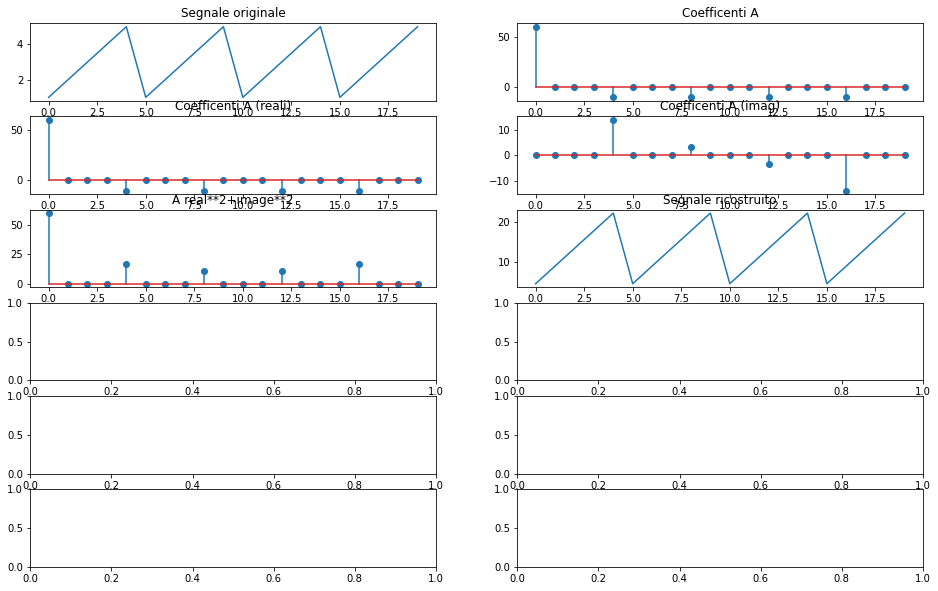

In [215]:
### AUDIO
import numpy as np
import matplotlib.pyplot as plt

#segnale_audio=np.random.randint(0,4096,11) # randomico
t=np.linspace(0,1,200)
#segnale_audio=np.sin(6*2*np.pi*t) #Freq e

segnale_audio=np.array([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]) #DENTE DI SEG
#segnale_audio=np.array([1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1])
Trasformata_Fourier(segnale_audio,len(segnale_audio))


In [1]:
print("ciao")

ciao


Errore ->  -0.16169490137107595


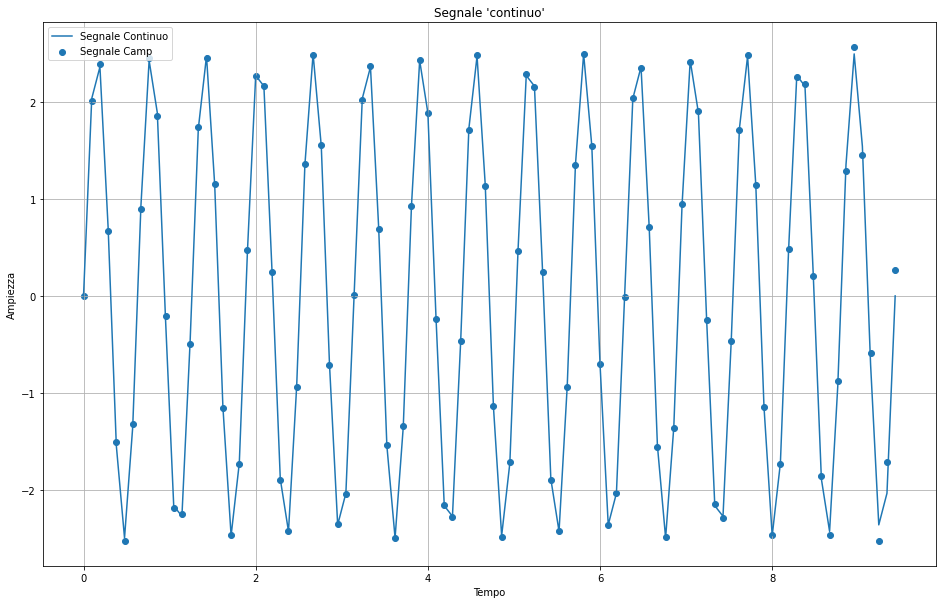

In [55]:
### WHITTAKER SHANNON
import numpy as np
import matplotlib.pyplot as plt

punti_continui=100

tempo_inizio=0
tempo_fine=np.pi*3 #np.pi*2
A=2.5
freq=10



tempo_continuo=np.linspace(tempo_inizio,tempo_fine,punti_continui)
segnale_continuo=A*np.sin(tempo_continuo*freq)
plt.figure(figsize=(16,10))
plt.grid()
plt.plot(tempo_continuo,segnale_continuo)
plt.xlabel("Tempo")
plt.ylabel("Ampiezza")
plt.title('Segnale \'continuo\'')

tempo_campionamento=0.1 # 1 secondo?
num_campioni=int(tempo_fine*1/tempo_campionamento)

#tempo_discreto= np.linspace(tempo_inizio,tempo_fine,num_campioni)
tempo_discreto=tempo_continuo
segnale_discreto=[]

for t in tempo_discreto:
    temp=0
    for n in range(1,num_campioni):
        temp+=(A*np.sin(n*tempo_campionamento*freq))*np.sinc((t-tempo_campionamento*n)/tempo_campionamento)
    segnale_discreto.append(temp)


    
#print(tempo_discreto)
#print(len(segnale_discreto))
plt.scatter(tempo_discreto,segnale_discreto)
plt.legend(['Segnale Continuo','Segnale Camp'])

print("Errore -> ",sum(np.sin(segnale_discreto)-segnale_discreto))


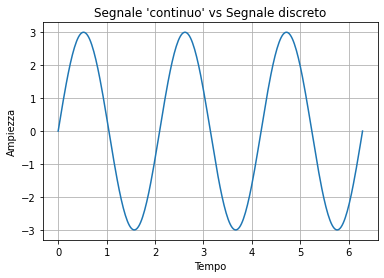

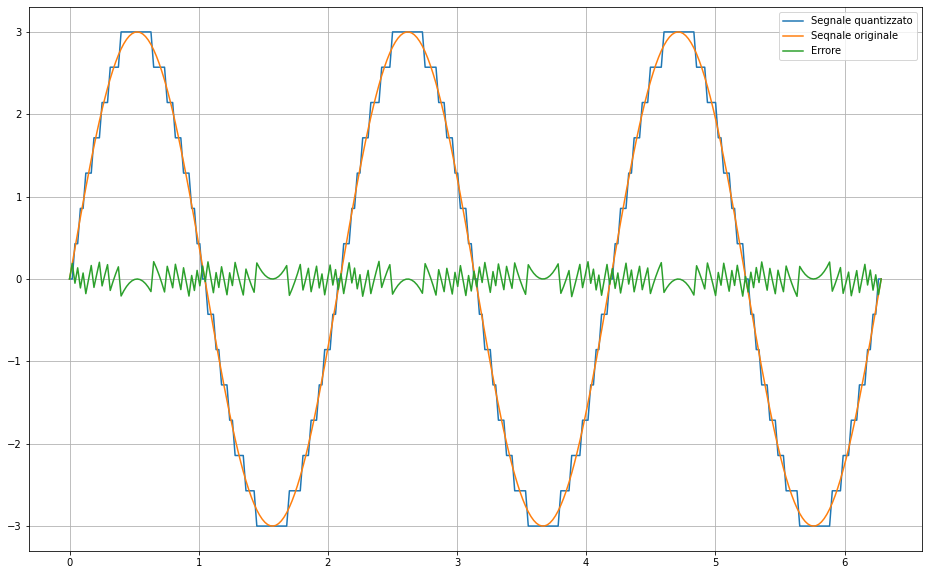

In [3]:
import numpy as np
import matplotlib.pyplot as plt

##quantizza segnale continuo
punti_continui=300
tempo_inizio=0
tempo_fine=np.pi*2
A=3
tempo_continuo=np.linspace(tempo_inizio,tempo_fine,punti_continui)
segnale_continuo=A*np.sin(tempo_continuo*3)

plt.grid()
plt.plot(tempo_continuo,segnale_continuo)
plt.xlabel("Tempo")
plt.ylabel("Ampiezza")
plt.title('Segnale \'continuo\' vs Segnale discreto')


def print_different_K(K):
    fig,axes=plt.subplots(K,figsize=(16,10))
    for i in range(K):
        K=i
        A_min=-A
        A_max=A
        segnale_quantizzato=[ np.floor(j/A*K)/(K)*A  for j in segnale_continuo]
        axes[i].grid()
        axes[i].plot(tempo_continuo,segnale_quantizzato)

#print_different_K(4)
A_min=-A
A_max=A
K=7
segnale_quantizzato=[ np.floor(j/A*K+0.5)/(K)*A  for j in segnale_continuo]

plt.figure(figsize=(16,10))
plt.grid()
plt.plot(tempo_continuo,segnale_quantizzato)
plt.plot(tempo_continuo,segnale_continuo)
plt.plot(tempo_continuo,segnale_continuo-segnale_quantizzato)
plt.legend(['Segnale quantizzato','Seqnale originale','Errore'])
#[((i-A_min)/(A_max-A_min))*K for i in segnale_continuo]

